# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [2]:
import getpass

password = getpass.getpass()

········


In [3]:
#Create a connection with create_engine to MySQL Workbench:

engine = create_engine("mysql+pymysql://{user}:{password}@{host}/{db}"
                       .format(user='root', password=password, host='localhost', db='lab_week20'))

In [4]:
connection = engine.connect()

In [5]:
data = connection.execute("SELECT * FROM wholesale_customers_data;").fetchall()

In [6]:
customers = pd.DataFrame(data)
customers.head()

,0,1,2,3,4,5,6,7
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
# query columns and creating a list for further steps
columns = connection.execute("SELECT * FROM wholesale_customers_data;").keys()
columns = list(columns)
columns

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [8]:
# renaming columns
customers.columns = columns
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

# Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [9]:
# checking the dataset
display(customers.shape)
customers.head()

(440, 8)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [10]:
# checking data types
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [11]:
# checking for missing data
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


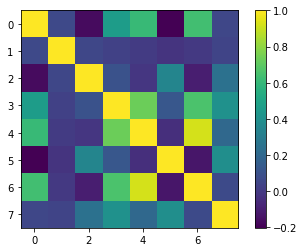

In [12]:
# checking for collinearity
display(customers.corr())

plt.imshow(customers.corr())
plt.colorbar()
plt.show()

In [13]:
# descriptive statistics
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


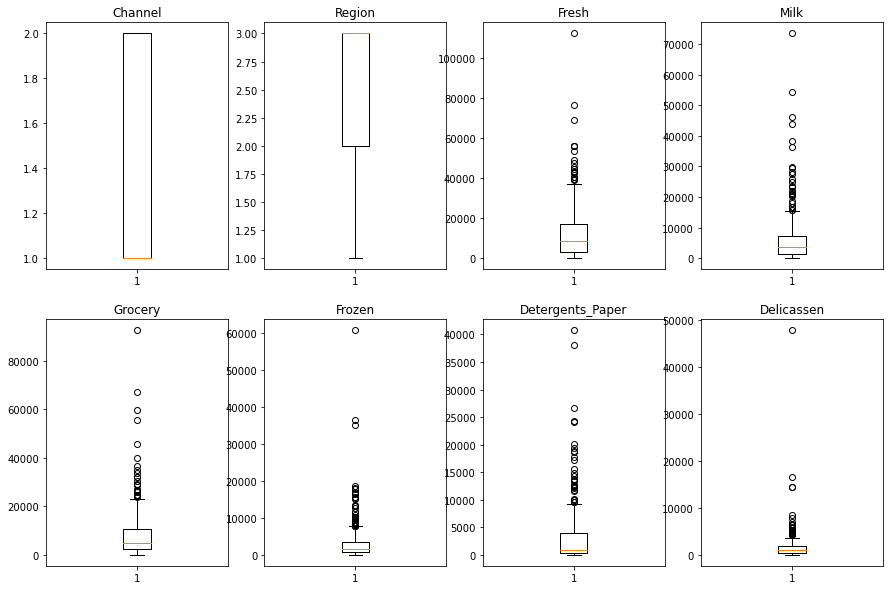

In [14]:
# boxplots to check for outliers
figure, axis = plt.subplots(2, 4, figsize=[15,10])

axis[0, 0].boxplot(customers['Channel'])
axis[0, 0].set_title("Channel")

axis[0, 1].boxplot(customers['Region'])
axis[0, 1].set_title("Region")

axis[0, 2].boxplot(customers['Fresh'])
axis[0, 2].set_title("Fresh")

axis[0, 3].boxplot(customers['Milk'])
axis[0, 3].set_title("Milk")

axis[1, 0].boxplot(customers['Grocery'])
axis[1, 0].set_title("Grocery")

axis[1, 1].boxplot(customers['Frozen'])
axis[1, 1].set_title("Frozen")

axis[1, 2].boxplot(customers['Detergents_Paper'])
axis[1, 2].set_title("Detergents_Paper")

axis[1, 3].boxplot(customers['Delicassen'])
axis[1, 3].set_title("Delicassen")

plt.show()

In [15]:
customers['Fresh'].sort_values(ascending=False).head()

181    112151
125     76237
284     68951
39      56159
258     56083
Name: Fresh, dtype: int64

In [16]:
customers['Milk'].sort_values(ascending=False).head()

86     73498
47     54259
85     46197
183    43950
61     38369
Name: Milk, dtype: int64

In [17]:
customers['Grocery'].sort_values(ascending=False).head()

85     92780
333    67298
61     59598
47     55571
65     45828
Name: Grocery, dtype: int64

In [18]:
customers['Frozen'].sort_values(ascending=False).head()

325    60869
183    36534
93     35009
196    18711
103    18028
Name: Frozen, dtype: int64

In [19]:
customers['Detergents_Paper'].sort_values(ascending=False).head()

85     40827
333    38102
61     26701
65     24231
47     24171
Name: Detergents_Paper, dtype: int64

In [20]:
customers['Delicassen'].sort_values(ascending=False).head()

183    47943
23     16523
71     14472
87     14351
181     8550
Name: Delicassen, dtype: int64

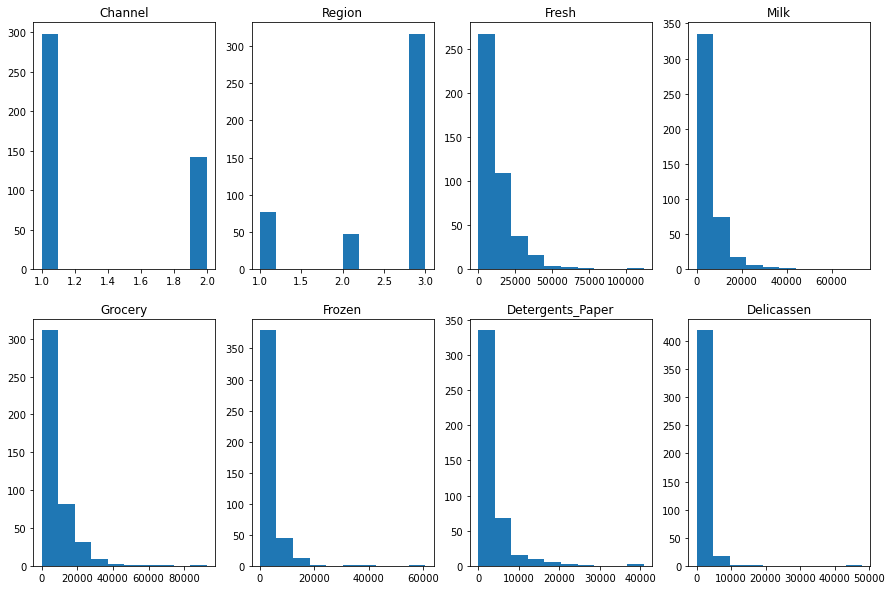

In [21]:
# data distribution
figure, axis = plt.subplots(2, 4, figsize=[15,10])

axis[0, 0].hist(customers['Channel'])
axis[0, 0].set_title("Channel")

axis[0, 1].hist(customers['Region'])
axis[0, 1].set_title("Region")

axis[0, 2].hist(customers['Fresh'])
axis[0, 2].set_title("Fresh")

axis[0, 3].hist(customers['Milk'])
axis[0, 3].set_title("Milk")

axis[1, 0].hist(customers['Grocery'])
axis[1, 0].set_title("Grocery")

axis[1, 1].hist(customers['Frozen'])
axis[1, 1].set_title("Frozen")

axis[1, 2].hist(customers['Detergents_Paper'])
axis[1, 2].set_title("Detergents_Paper")

axis[1, 3].hist(customers['Delicassen'])
axis[1, 3].set_title("Delicassen")

plt.show()

In [ ]:
# Your observations here
'''
- 'Channel' and 'Region' are categorical data. The rest is continuous data.
- The dataset does not include null values.
- 'Channel' has a high correlation with 'Grocery' (.60) and 'Detergents_Paper' (.63). Also 'Milk' has a high correlation
  with 'Grocery' (.72) and 'Detergents_Paper' (.66). However,'Grocery' and 'Detergents_Paper' have the highest correlation
  with .92.
- All columns have one/two extreme outliers. However, this is not one specific datapoint within the dataset.
- The data distribution is for all continuous data extremely positive skewed.
- Pareto principle: Most of the data seems to be within the lower section (1st and 2nd quartile), while all high values are
  more rare for all columns. This can be seen in the histograms and boxplots.
'''

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [23]:
# transforming categorical data into dummy variables
customers = pd.get_dummies(customers, columns=['Channel','Region'])
customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [24]:
# removing extrem outliers
customers = customers.drop([181],axis=0)  # column 'Fresh'
customers = customers.drop([86],axis=0)  # column 'Milk'
customers = customers.drop([85],axis=0)  # column 'Grocery'
customers = customers.drop([325],axis=0)  # column 'Frozen'
customers = customers.drop([333],axis=0)  # column 'Detergents_Paper'  (outlier with index 85 has already been removed)
customers = customers.drop([183],axis=0)  # column 'Delicassen'

In [25]:
# reseting index and checking the dataset size
customers.reset_index()
customers.shape

(434, 11)

In [ ]:
# Your comment here
'''
- The categorical data needs to be transformed into dummy variables, otherwise, the categorical values will be interpreted
  as continuous data which would make the model bad.
- The most extreme outliers are removed, to reduce noise and variance in the model.
'''

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [27]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler = scaler.fit(customers)
customers_scale = scaler.transform(customers)
# customers_scale = scaler.fit_transform(customers)  # either .fit() and .transform() or .fit_transform() to do both steps in one
customers_scale

array([[ 0.08848812,  0.71589545,  0.00776326, ..., -0.46442036,
        -0.34011944,  0.62532043],
       [-0.3930863 ,  0.74168397,  0.25776682, ..., -0.46442036,
        -0.34011944,  0.62532043],
       [-0.45349763,  0.57389111,  0.02308486, ..., -0.46442036,
        -0.34011944,  0.62532043],
       ...,
       [ 0.24826923,  1.69251018,  2.83316469, ..., -0.46442036,
        -0.34011944,  0.62532043],
       [-0.11565756, -0.56934428, -0.65604788, ..., -0.46442036,
        -0.34011944,  0.62532043],
       [-0.75950162, -0.61673488, -0.62141858, ..., -0.46442036,
        -0.34011944,  0.62532043]])

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [28]:
from sklearn.cluster import KMeans

model = KMeans()
model = model.fit(customers_scale)

customers['labels'] = model.labels_
customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,labels
0,12669,9656,7561,214,2674,1338,0,1,0,0,1,2
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1,2
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1,2
3,13265,1196,4221,6404,507,1788,1,0,0,0,1,0
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1,2


Count the values in `labels`.

In [29]:
customers['labels'].value_counts()

0    175
2     90
6     60
4     33
3     31
5     28
1     14
7      3
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [30]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5)   # eps=0.5 is also the default value (maximum distance between two samples for one to be considered as in the neighborhood of the other)
model= model.fit(customers_scale)

customers['labels_DBSCAN'] = model.labels_
customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,labels,labels_DBSCAN
0,12669,9656,7561,214,2674,1338,0,1,0,0,1,2,-1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1,2,-1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1,2,-1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1,0,-1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1,2,-1


Count the values in `labels_DBSCAN`.

In [31]:
customers['labels_DBSCAN'].value_counts()

-1    321
 0     97
 2     11
 1      5
Name: labels_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

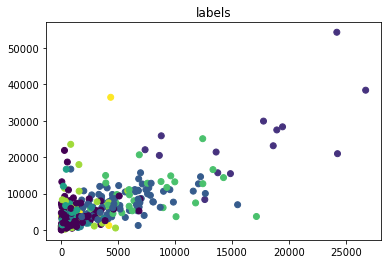

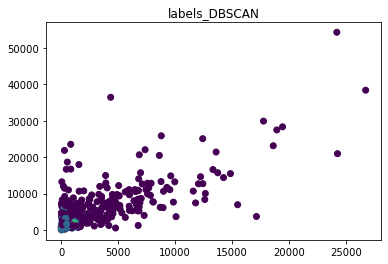

In [32]:
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels'])
plt.title('labels')
plt.show()

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN'])
plt.title('labels_DBSCAN')
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

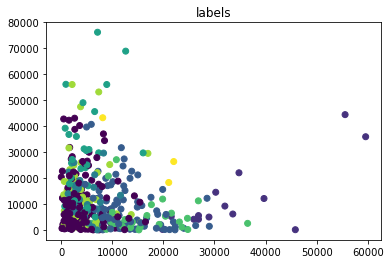

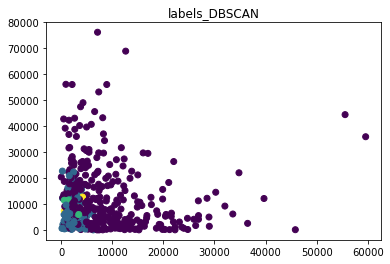

In [33]:
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels'])
plt.title('labels')
plt.show()

plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN'])
plt.title('labels_DBSCAN')
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

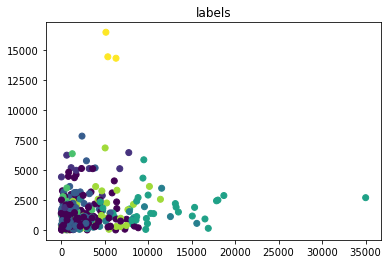

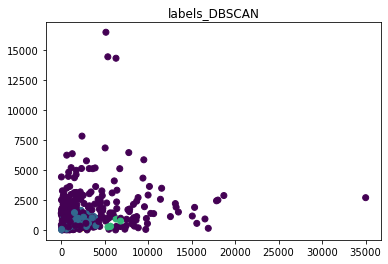

In [34]:
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels'])
plt.title('labels')
plt.show()

plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels_DBSCAN'])
plt.title('labels_DBSCAN')
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [35]:
customers_labels = customers.groupby(by='labels').mean()
display(customers_labels)
customers_labels_DBSCAN = customers.groupby(by='labels_DBSCAN').mean()
display(customers_labels_DBSCAN)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,labels_DBSCAN
labels,,,,,,,,,,,,
0,10372.211429,3020.640000,3505.348571,2009.348571,774.605714,1032.497143,1.000000,0.000000,0.000000,0.0,1.000000,-0.388571
1,12043.142857,25129.285714,34379.071429,2613.928571,16373.142857,3479.500000,0.000000,1.000000,0.142857,0.0,0.857143,-1.000000
2,9072.688889,7739.300000,12446.777778,1406.733333,5199.622222,1451.777778,0.000000,1.000000,0.000000,0.0,1.000000,-1.000000
3,11046.677419,1935.548387,4218.419355,3685.387097,682.516129,1020.387097,0.870968,0.129032,0.000000,1.0,0.000000,-1.000000
4,28278.848485,4075.212121,4366.212121,11324.757576,613.878788,1734.272727,1.000000,0.000000,0.030303,0.0,0.969697,-1.000000
5,5088.464286,10411.250000,16782.642857,1285.142857,7895.964286,1366.321429,0.000000,1.000000,0.500000,0.5,0.000000,-1.000000
6,12407.850000,3827.483333,4058.750000,2995.566667,951.016667,1187.550000,0.966667,0.033333,1.000000,0.0,0.000000,-0.450000
7,29309.666667,14238.000000,17059.333333,5613.000000,3363.000000,15115.333333,0.666667,0.333333,0.000000,0.0,1.000000,-1.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,labels
labels_DBSCAN,,,,,,,,,,,,
-1,12997.894081,6647.112150,9370.239875,3239.074766,3474.311526,1661.803738,0.566978,0.433022,0.205607,0.140187,0.654206,2.722741
0,7745.061856,1774.907216,2242.350515,1557.329897,427.432990,645.577320,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,9150.600000,1859.600000,1607.000000,5972.400000,376.600000,502.800000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,7405.545455,1830.363636,1912.363636,1335.636364,345.545455,473.181818,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here
'''
DBSCAN seems to perform betten than K-Means, as the label means have a smaller variation throughout all columns.
'''

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [37]:
# 4 clusters
model = KMeans(n_clusters=4)
model = model.fit(customers_scale)

customers['labels_4'] = model.labels_

# 3 clusters
model = KMeans(n_clusters=3)
model = model.fit(customers_scale)

customers['labels_3'] = model.labels_

# 6 clusters
model = KMeans(n_clusters=6)
model = model.fit(customers_scale)

customers['labels_6'] = model.labels_

# 10 clusters
model = KMeans(n_clusters=10)
model = model.fit(customers_scale)

customers['labels_10'] = model.labels_

customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,labels,labels_DBSCAN,labels_4,labels_3,labels_6,labels_10
0,12669,9656,7561,214,2674,1338,0,1,0,0,1,2,-1,3,1,1,4
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1,2,-1,3,1,1,4
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1,2,-1,3,1,1,4
3,13265,1196,4221,6404,507,1788,1,0,0,0,1,0,-1,2,0,0,0
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1,2,-1,3,1,1,4


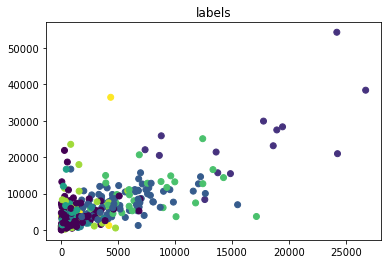

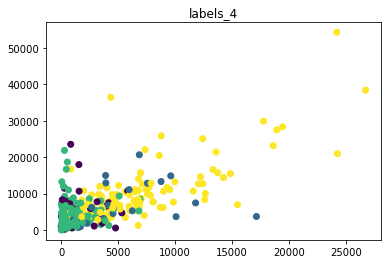

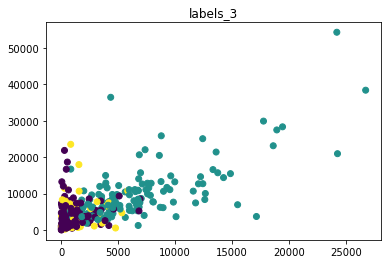

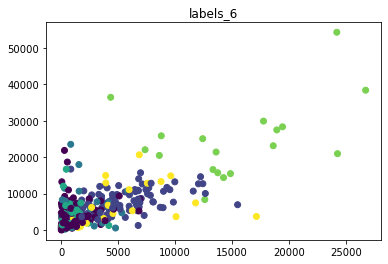

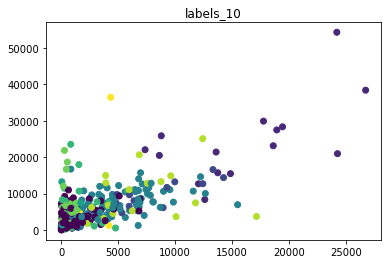

In [38]:
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels'])
plt.title('labels')
plt.show()

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_4'])
plt.title('labels_4')
plt.show()

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_3'])
plt.title('labels_3')
plt.show()

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_6'])
plt.title('labels_6')
plt.show()

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_10'])
plt.title('labels_10')
plt.show()

In [ ]:
# Your comment here
'''
For K-Means a smaller cluster parameter seems to perform better as well. A parameter of 4 or 3 could be recommended.
'''

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [40]:
# eps=0.5, samples=3
model = DBSCAN(eps=0.5, min_samples=3)
model= model.fit(customers_scale)

customers['labels_DBSCAN_05_3'] = model.labels_

# eps=0.5, samples=7
model = DBSCAN(eps=0.5, min_samples=7)
model= model.fit(customers_scale)

customers['labels_DBSCAN_05_7'] = model.labels_

# eps=1, samples=5
model = DBSCAN(eps=1, min_samples=5)
model= model.fit(customers_scale)

customers['labels_DBSCAN_1_5'] = model.labels_

# eps=1, samples=3
model = DBSCAN(eps=1, min_samples=3)
model= model.fit(customers_scale)

customers['labels_DBSCAN_1_3'] = model.labels_

# eps=1, samples=7
model = DBSCAN(eps=1, min_samples=7)
model= model.fit(customers_scale)

customers['labels_DBSCAN_1_7'] = model.labels_

# eps=0.2, samples=5
model = DBSCAN(eps=0.2, min_samples=5)
model= model.fit(customers_scale)

customers['labels_DBSCAN_02_5'] = model.labels_

# eps=0.2, samples=3
model = DBSCAN(eps=0.2, min_samples=3)
model= model.fit(customers_scale)

customers['labels_DBSCAN_02_3'] = model.labels_

# eps=0.2, samples=7
model = DBSCAN(eps=0.2, min_samples=7)
model= model.fit(customers_scale)

customers['labels_DBSCAN_02_7'] = model.labels_

customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,...,labels_6,labels_10,labels_DBSCAN_05_3,labels_DBSCAN_05_7,labels_DBSCAN_1_5,labels_DBSCAN_1_3,labels_DBSCAN_1_7,labels_DBSCAN_02_5,labels_DBSCAN_02_3,labels_DBSCAN_02_7
0,12669,9656,7561,214,2674,1338,0,1,0,0,...,1,4,-1,-1,0,0,0,-1,-1,-1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,...,1,4,-1,-1,0,0,0,-1,-1,-1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,...,1,4,-1,-1,-1,-1,-1,-1,-1,-1
3,13265,1196,4221,6404,507,1788,1,0,0,0,...,0,0,-1,-1,1,1,1,-1,-1,-1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,...,1,4,-1,-1,-1,-1,-1,-1,-1,-1


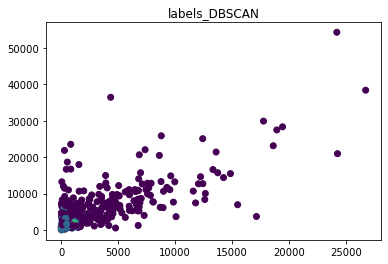

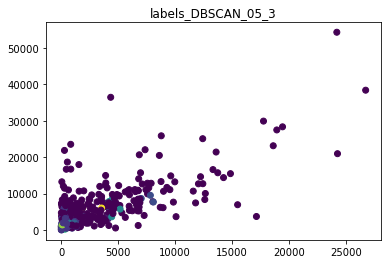

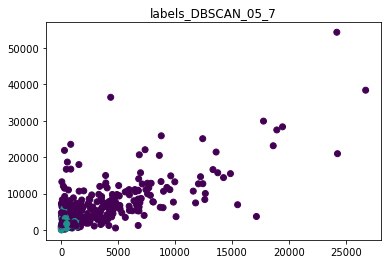

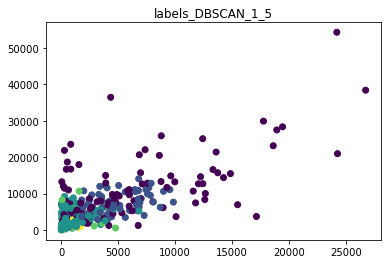

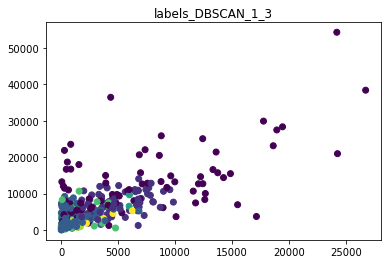

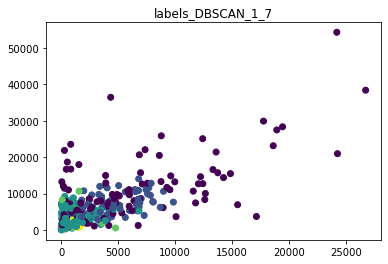

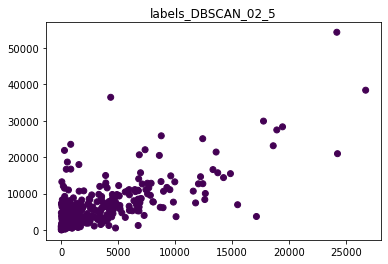

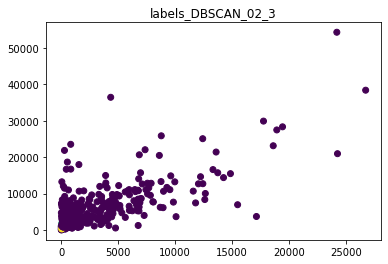

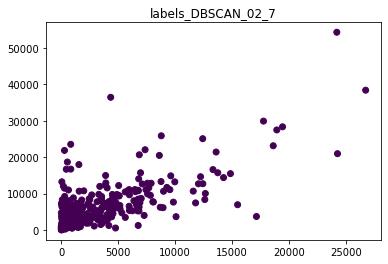

In [41]:
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN'])
plt.title('labels_DBSCAN')
plt.show()

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN_05_3'])
plt.title('labels_DBSCAN_05_3')
plt.show()

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN_05_7'])
plt.title('labels_DBSCAN_05_7')
plt.show()

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN_1_5'])
plt.title('labels_DBSCAN_1_5')
plt.show()

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN_1_3'])
plt.title('labels_DBSCAN_1_3')
plt.show()

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN_1_7'])
plt.title('labels_DBSCAN_1_7')
plt.show()

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN_02_5'])
plt.title('labels_DBSCAN_02_5')
plt.show()

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN_02_3'])
plt.title('labels_DBSCAN_02_3')
plt.show()

plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN_02_7'])
plt.title('labels_DBSCAN_02_7')
plt.show()

In [ ]:
# Your comment here
'''
In general a smaller number of neighbours (min_samples) samples seems to perform better.
Regarding the maximum distance between neighbours (eps), a higher number seems to perform better in this case.
'''